<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/19_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 합성공 시각화

In [2]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/수업/머신러닝/best-cnn-model.h5')

In [3]:
model.layers

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
# weights[0] : 가중치, weights[1] : 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
# numpy() : Tensor 객체를 ndarray로 변환
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01280494 0.23428594


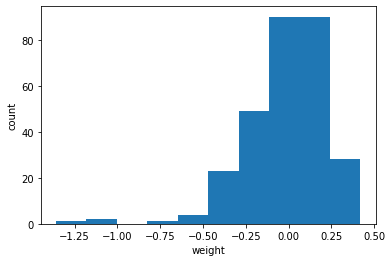

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1)) # 1차원 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

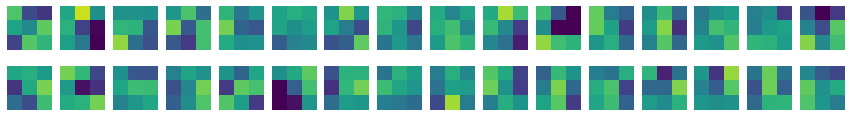

In [8]:
# 첫번쨰 합성곱 층 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [9]:
# 훈련하지 않은 모델 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [10]:
no_training_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0044038 0.08150771


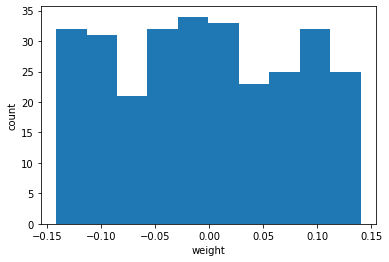

In [13]:
plt.hist(no_training_weights.reshape(-1)) # 1차원 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

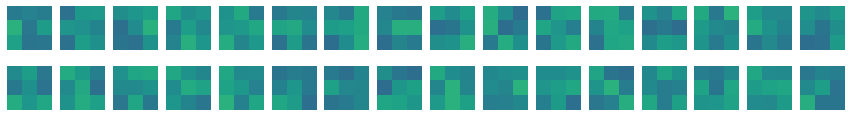

In [14]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [15]:
# 특성맵 시각화

In [16]:
print(model.input)
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [17]:
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti

4422102/4422102 [==============================] - 0s 0us/step


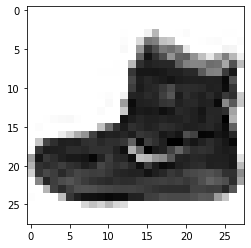

In [18]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [19]:
print(train_input.shape)
print(train_input[0].shape) # 배열 인덱싱
print(train_input[0:1].shape) # 배열 슬라이싱

(60000, 28, 28)
(28, 28)
(1, 28, 28)


In [20]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 7s 7s/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


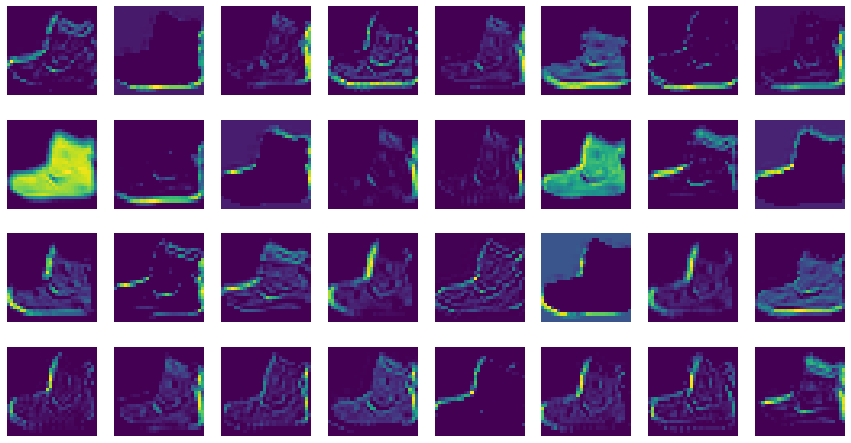

In [22]:
# 첫번쨰 Conv2D의 특성맵 시각화
fig, axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [23]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
conv2_acti

In [24]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 78ms/step


In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


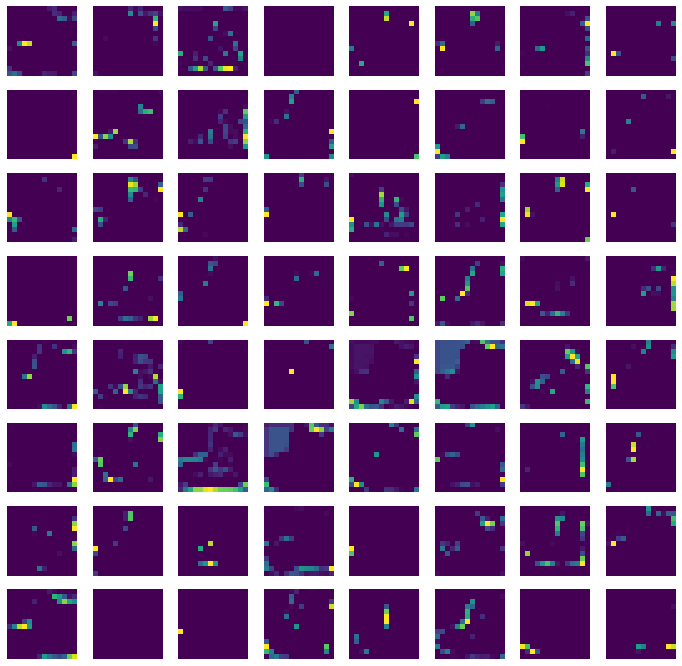

In [26]:
# 두번쨰 Conv2D의 특성맵 시각화
fig, axs = plt.subplots(8, 8, figsize = (12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()